In [48]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import numpy as np
import math


In [49]:
Read = pd.read_excel('Master SKU List.xlsx')
#DoubleSku = Read[Read['SKU'] == '/']
Insert = Read.copy()
InsertsandBox =  Insert['Product Name'].str.contains('(?:Box Only)|(?:Insert Only)')
unique_status = Read['Status'].unique()
unique_application = Read['Application'].unique()
unique_config = Read['Config'].unique()
unique_insert_style = Read['Insert Style'].unique()
unique_box_style = Read['Box Style'].unique()
unique_material = Read['Material'].unique()
unique_mfg_method = Read['Mfg. Method'].unique()

print("Unique values in 'Status':", unique_status)
print("Unique values in 'Application':", unique_application)
print("Unique values in 'Config':", unique_config)
print("Unique values in 'Insert Style':", unique_insert_style)
print("Unique values in 'Box Style':", unique_box_style)
print("Unique values in 'Material':", unique_material)
print("Unique values in 'Mfg. Method':", unique_mfg_method)

# Assuming final_df is your DataFrame
unique_status_count = Read['Status'].value_counts()
unique_application_count = Read['Application'].value_counts()
unique_config_count = Read['Config'].value_counts()
unique_insert_style_count = Read['Insert Style'].value_counts()
unique_box_style_count = Read['Box Style'].value_counts()
unique_material_count = Read['Material'].value_counts()
unique_mfg_method_count = Read['Mfg. Method'].value_counts()

print("Count of unique values in 'Status':\n", unique_status_count)
print("\nCount of unique values in 'Application':\n", unique_application_count)
print("\nCount of unique values in 'Config':\n", unique_config_count)
print("\nCount of unique values in 'Insert Style':\n", unique_insert_style_count)
print("\nCount of unique values in 'Box Style':\n", unique_box_style_count)
print("\nCount of unique values in 'Material':\n", unique_material_count)
print("\nCount of unique values in 'Mfg. Method':\n", unique_mfg_method_count)

Master = Read.copy()

Master = Master[
    (~Master['SKU'].str.contains('/')) & 
    (~Master['Product Name'].str.contains('(?:Box Only)|(?:Insert Only)')) &
    (Master['Application'] != 'Insert')
]

Master['SKU'] = Master['SKU'].str[:5]
Master['L*H'] = Master['Insert Cell Length (in)'] * Master['Insert Cell Width (in)']
Master['pi(r^2)'] = math.pi * (Master['Insert Cutout Diameter (in)'] / 2) ** 2
Master['Area'] = Master['pi(r^2)'].fillna(Master['L*H'])
Master['Insert Height'] = Master['Insert Cell Depth (in)'].fillna(Master['Insert Cutout Height (in)'])




columns_to_remove = ['Insert Cutout Height (in)', 'Insert Cell Depth (in)','Insert Cell Length (in)', 
                     'Insert Cell Width (in)', 'Insert Cutout Diameter (in)', 
                     'L*H', 'pi(r^2)','Pallet Qty', 'Pallet Dims', 'Pallet Wt (lbs)', 
                     'Gross Price ($)', 'Unit Rate', 'Base Rate', '% Discount', 'Single Page Order Insert', 
                     'Height Range', 'Dia. Range (in)' ]

                
Loopdf = Master.drop(columns=columns_to_remove)


for index, row in Loopdf.iterrows():
    # Count the number of missing values in the row
    num_missing_values = row.isnull().sum()
    
    # Check if the row has more than one missing value
    if num_missing_values > 1:
        sku_value = row['SKU']
        print(f"Row {index + 1} with Sku {sku_value} has more than one missing value:")
        for col in Loopdf.columns:
            if pd.isnull(row[col]) or row[col] == 0:
                print(f"Column {col} has missing value: {row[col]}")
        print()
        continue  # Skip checking individual columns for this row
    
    
for index, row in Loopdf.iterrows():
    # Count the number of missing values in the row
    num_missing_values = row.isnull().sum()
    # Check if the row has more than one missing value
    if num_missing_values >= 1:
        print('a')
        sku_value = row['SKU']
        print(f"Row {index + 1} with Sku {sku_value} one or more missing value:")
        for col in Loopdf.columns:
            if pd.isnull(row[col]) or row[col] == 0:
                print(f"Column {col} has missing value: {row[col]}")
        print()
        continue  # Skip checking individual columns for this row

        

            
for column in Master.columns:
    count_zeros = (Master[column] == 0).sum()
    count_nans = Master[column].isnull().sum()
    if count_zeros > 0 or count_nans > 0:
        print(f"Column '{column}':")
        print(f"  Zeros: {count_zeros}")
        print(f"  NaNs: {count_nans}")


print(Master.dtypes)


columns_to_drop = ['Pallet Qty', 'Pallet Dims', 'Pallet Wt (lbs)', 'Gross Price ($)', 'Unit Rate', 
                   'Base Rate', '% Discount', 'Single Page Order Insert']
Master = Master.drop(columns=columns_to_drop)

Sku = pd.read_excel('Purchase Prices By Sku.xlsx')
Sku.rename(columns={'Sku': 'SKU'}, inplace=True)

final_df = pd.merge(Sku, Master, on='SKU', how='inner')

final_df.to_excel('final_df.xlsx', index=False)


Unique values in 'Status': ['Listed' 'Unlisted' 'Add']
Unique values in 'Application': ['Shipping Box' 'Box' 'Retail Box' 'Insert']
Unique values in 'Config': ['Single' '3-Pack' '6-Pack' '2-Pack' 'Box Only' '4-Pack' '12-Pack'
 '8-Pack']
Unique values in 'Insert Style': ['Attached' 'Box Only' 'Open' 'Closed' 'Special']
Unique values in 'Box Style': ['RETF - Econo' 'RETF - Traditional' 'RSC' 'FOL' 'Insert Only']
Unique values in 'Material': ['200# E Flute Kraft' '200# B Flute Kraft' '275# C Flute Kraft']
Unique values in 'Mfg. Method': ['Flat Cutting Die' 'Machine-Run' 'Mixed']
Count of unique values in 'Status':
 Listed      127
Unlisted     24
Add          13
Name: Status, dtype: int64

Count of unique values in 'Application':
 Shipping Box    118
Retail Box       20
Box              14
Insert           12
Name: Application, dtype: int64

Count of unique values in 'Config':
 Single      43
3-Pack      34
12-Pack     25
6-Pack      22
2-Pack      22
Box Only    14
4-Pack       3
8-Pack 

In [50]:

1. Column 'Insert Cutout Diameter (in)': 138 NaNs
2. Column 'Insert Cutout Height (in)': 138 NaNs
3. Column 'Blank Size Corr Dir (in)': 33 NaNs
4. Column 'Blank Size Opp Corr Dir': 33 NaNs
5. Column 'Blank Size Area (in²)': 33 NaNs
6. Column 'Single Unit Inches of Rule': 46 NaNs
7. Column 'Box Internal Length': 12 NaNs
8. Column 'Box Internal Width': 12 NaNs
9. Column 'Box Internal Depth': 12 NaNs
10. Column 'Box External Length': 12 NaNs
11. Column 'Box External Width': 12 NaNs
12. Column 'Box External Depth': 12 NaNs
13. Column 'Dia. (in)': 14 NaNs
14. Column 'Dia. Range (in)': 14 NaNs
15. Column 'Ht. (in)': 14 NaNs
16. Column 'Height Range': 14 NaNs
17. Column 'Sold In': 24 NaNs
18. Column 'Pallet Qty': 42 NaNs
19. Column 'Single Page Order Insert': 24 NaNs
20. Column 'L*H': 40 NaNs
21. Column 'pi(r^2)': 138 NaNs
22. Column 'Area': 14 NaNs #14 Missing are only from the Box Only orders 
23. Column 'Insert Cell Length (in)': 40 NaNs
24. Column 'Insert Cell Width (in)': 40 NaNs
25. Column 'Insert Cell Depth (in)': 40 NaNs


SyntaxError: invalid syntax (3946503689.py, line 1)

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

summary_statistics = final_df.describe()

print(summary_statistics)

for col in final_df.columns:
    print(col)
    print(final_df[col].dtype)
    


              Bill #  Quantity Ordered  Unit Rate Paid  \
count     317.000000        317.000000      317.000000   
mean   297430.059937       2430.488959        1.026719   
std     10144.937579       1660.635429        0.448760   
min    274870.000000        500.000000        0.300000   
25%    291620.000000       1500.000000        0.681000   
50%    300814.000000       2000.000000        0.890000   
75%    306778.000000       3000.000000        1.380000   
max    309597.000000      12000.000000        2.248000   

       Insert Cell Length (in)  Insert Cell Width (in)  \
count               172.000000              172.000000   
mean                  3.197674                3.196039   
std                   0.501834                0.504266   
min                   1.875000                1.875000   
25%                   2.875000                2.875000   
50%                   3.125000                3.125000   
75%                   3.625000                3.625000   
max          

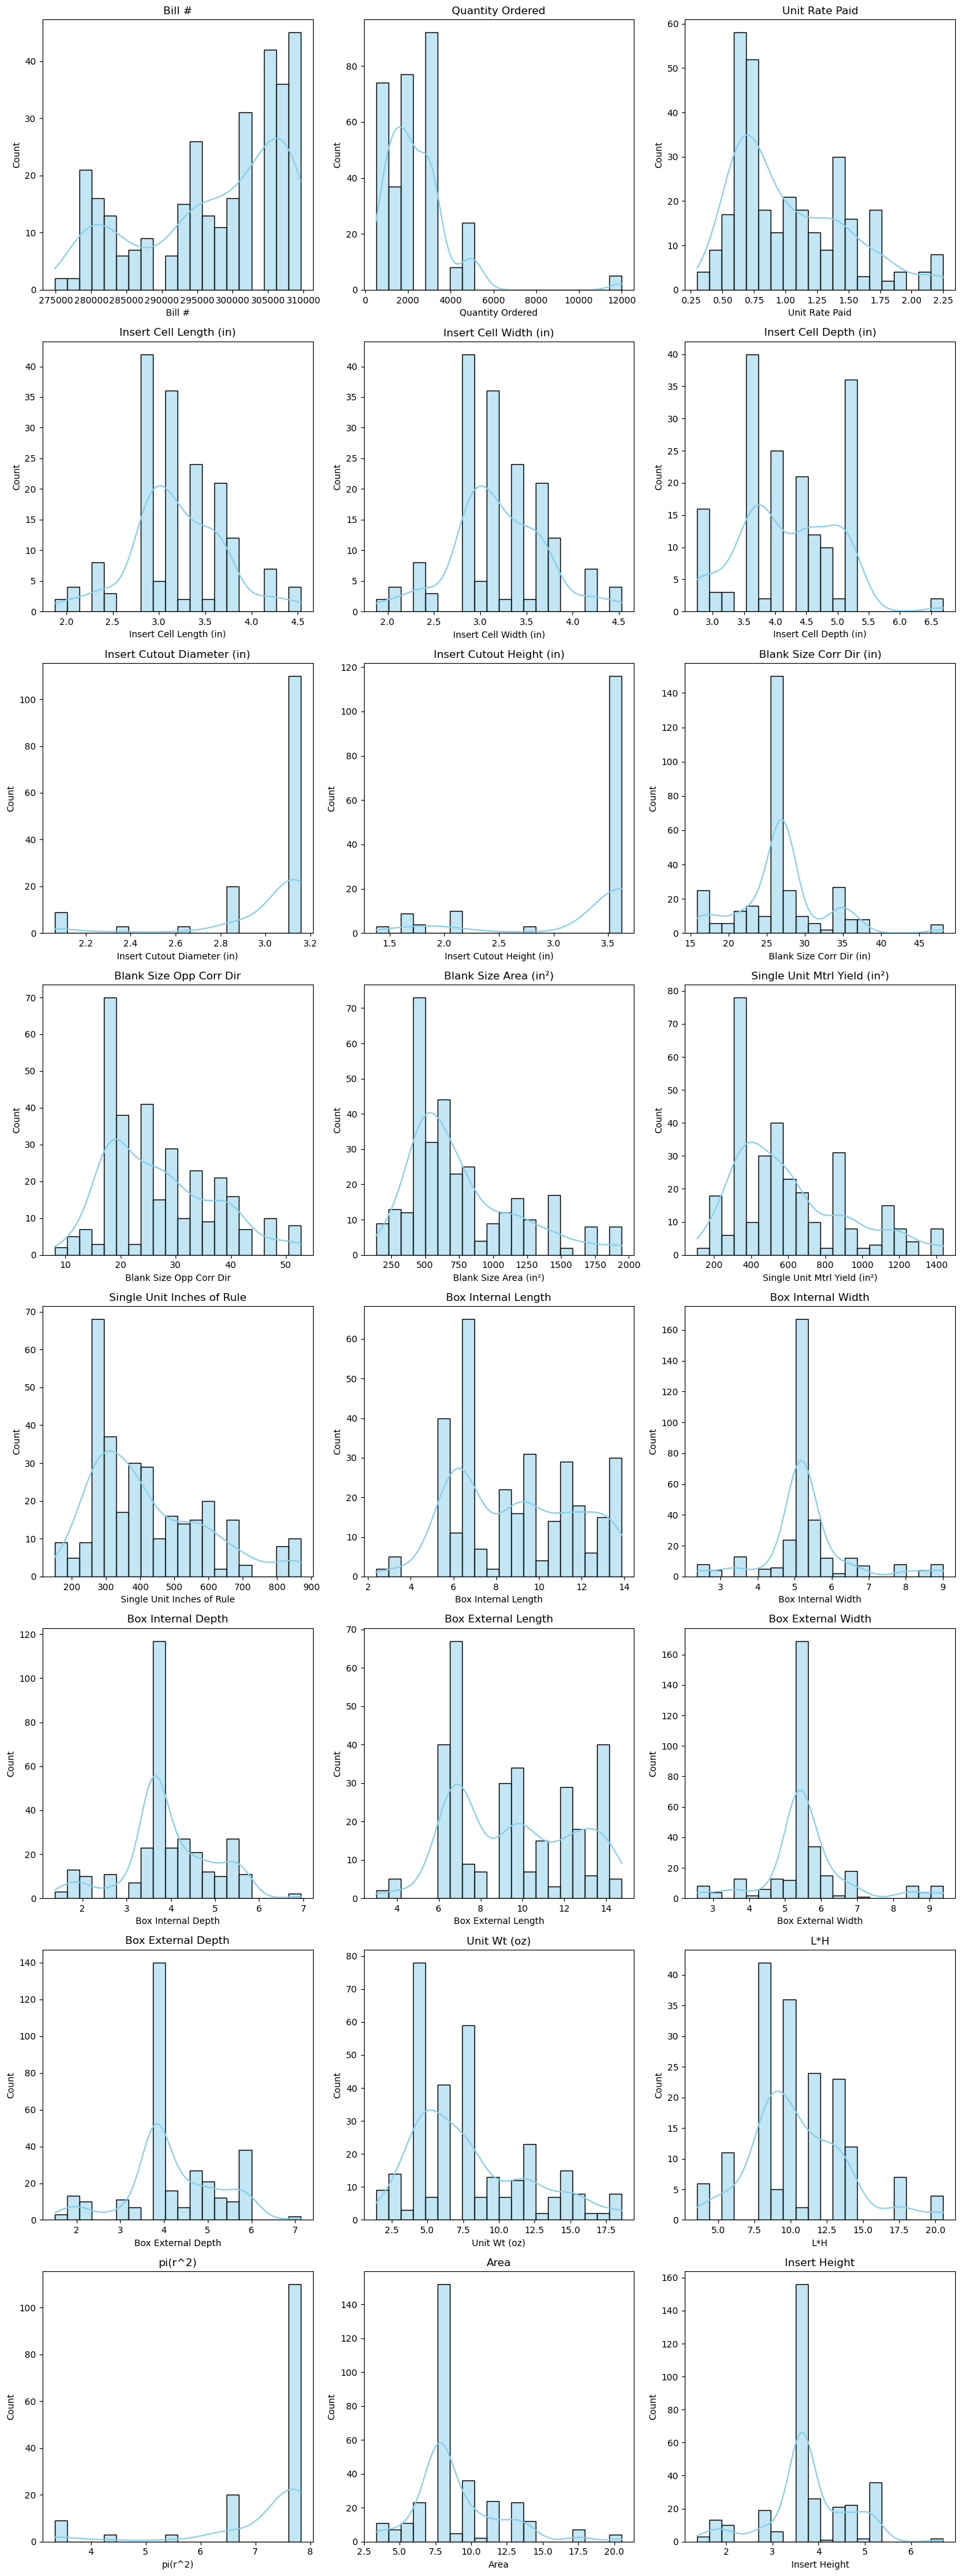

In [52]:
numeric_columns = final_df.select_dtypes(include=['number'])

num_cols = 3 

num_rows = -(-len(numeric_columns.columns) // num_cols)  

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

axes = axes.flatten()

for i, col in enumerate(numeric_columns.columns):
    sns.histplot(data=final_df, x=col, ax=axes[i], bins=20, kde=True, color='skyblue', edgecolor='black')
    axes[i].set_title(col)

for j in range(len(numeric_columns.columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [53]:
from sklearn.impute import SimpleImputer

final_df['Dia. (in)'] = pd.to_numeric(final_df['Dia. (in)'], errors='coerce')
final_df['Ht. (in)'] = pd.to_numeric(final_df['Ht. (in)'], errors='coerce')
final_df.dropna(subset=['Dia. (in)',  'Ht. (in)', ], inplace=True)

oneHot_cols = [ 'Status', 'Application', 'Config', 
                    'Insert Style', 'Box Style', 'Material', 'Mfg. Method' ]
X =  final_df[oneHot_cols]
X_encoded = pd.get_dummies(X, columns=oneHot_cols, drop_first=True)

# Assuming final_df is your DataFrame
unique_status = final_df['Status'].unique()
unique_application = final_df['Application'].unique()
unique_config = final_df['Config'].unique()
unique_insert_style = final_df['Insert Style'].unique()
unique_box_style = final_df['Box Style'].unique()
unique_material = final_df['Material'].unique()
unique_mfg_method = final_df['Mfg. Method'].unique()

print("Unique values in 'Status':", unique_status)
print("Unique values in 'Application':", unique_application)
print("Unique values in 'Config':", unique_config)
print("Unique values in 'Insert Style':", unique_insert_style)
print("Unique values in 'Box Style':", unique_box_style)
print("Unique values in 'Material':", unique_material)
print("Unique values in 'Mfg. Method':", unique_mfg_method)


# Assuming final_df is your DataFrame
unique_status_count = final_df['Status'].value_counts()
unique_application_count = final_df['Application'].value_counts()
unique_config_count = final_df['Config'].value_counts()
unique_insert_style_count = final_df['Insert Style'].value_counts()
unique_box_style_count = final_df['Box Style'].value_counts()
unique_material_count = final_df['Material'].value_counts()
unique_mfg_method_count = final_df['Mfg. Method'].value_counts()

print("Count of unique values in 'Status':\n", unique_status_count)
print("\nCount of unique values in 'Application':\n", unique_application_count)
print("\nCount of unique values in 'Config':\n", unique_config_count)
print("\nCount of unique values in 'Insert Style':\n", unique_insert_style_count)
print("\nCount of unique values in 'Box Style':\n", unique_box_style_count)
print("\nCount of unique values in 'Material':\n", unique_material_count)
print("\nCount of unique values in 'Mfg. Method':\n", unique_mfg_method_count)



numerical_cols = [
    'Single Unit Mtrl Yield (in²)',
    'Single Unit Inches of Rule',
    'Box Internal Length',
    'Box Internal Width',
    'Box Internal Depth',
    'Box External Length',
    'Box External Width',
    'Box External Depth',
    'Area',
    'Insert Height',
    'Dia. (in)',  
    'Ht. (in)'
    
]



x_numerical = final_df[numerical_cols]

# Impute missing values for 'Single Unit Inches of Rule' using the mean
imputer = SimpleImputer(strategy='mean')
x_numerical.loc[:, ['Single Unit Inches of Rule']] = imputer.fit_transform(x_numerical.loc[:, ['Single Unit Inches of Rule']])

x_combined = pd.concat([x_numerical, X_encoded], axis=1)

print(x_combined.columns.tolist())




Unique values in 'Status': ['Listed' 'Add']
Unique values in 'Application': ['Shipping Box' 'Retail Box']
Unique values in 'Config': ['3-Pack' 'Single' '4-Pack' '8-Pack' '2-Pack' '6-Pack']
Unique values in 'Insert Style': ['Attached' 'Open' 'Closed']
Unique values in 'Box Style': ['RETF - Traditional' 'RETF - Econo']
Unique values in 'Material': ['200# E Flute Kraft' '200# B Flute Kraft']
Unique values in 'Mfg. Method': ['Flat Cutting Die']
Count of unique values in 'Status':
 Listed    293
Add        12
Name: Status, dtype: int64

Count of unique values in 'Application':
 Shipping Box    280
Retail Box       25
Name: Application, dtype: int64

Count of unique values in 'Config':
 Single    117
3-Pack     96
2-Pack     56
6-Pack     25
4-Pack     10
8-Pack      1
Name: Config, dtype: int64

Count of unique values in 'Insert Style':
 Attached    170
Closed      100
Open         35
Name: Insert Style, dtype: int64

Count of unique values in 'Box Style':
 RETF - Econo          263
RETF - 

/var/folders/m2/brr7wk_900lcx_2gj65_1xvm0000gn/T/ipykernel_12118/544689208.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_numerical.loc[:, ['Single Unit Inches of Rule']] = imputer.fit_transform(x_numerical.loc[:, ['Single Unit Inches of Rule']])


In [54]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define features (X) and target variable (y)
X = x_combined
y = final_df['Unit Rate Paid']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Feature names
feature_names = ['Single Unit Mtrl Yield (in²)', 'Single Unit Inches of Rule', 'Box Internal Length', 
                 'Box Internal Width', 'Box Internal Depth', 'Box External Length', 'Box External Width', 
                 'Box External Depth', 'Area', 'Insert Height', 'Height Range categorical', 
                 'Diameter Range categorical', 'Status_Listed', 'Application_Shipping Box', 'Config_3-Pack', 
                 'Config_4-Pack', 'Config_6-Pack', 'Config_8-Pack', 'Config_Single', 'Insert Style_Closed', 
                 'Insert Style_Open', 'Box Style_RETF - Traditional', 'Material_200# E Flute Kraft']

# Print intercept, coefficients, and feature names
print("Intercept:", intercept)
print("Coefficients:", coefficients)
print("Features:", feature_names)


Mean Squared Error: 0.0261770259694082
Intercept: -0.7766290767897106
Coefficients: [ 2.16889854e-03 -1.42191864e-03  7.25462290e-01 -5.27142177e+00
  2.67222019e+00 -7.44708852e-01  5.30425598e+00 -2.06934441e+00
 -6.49764210e-02 -4.75746837e-01  3.49162025e-01 -2.18924407e-01
  3.91435875e-02 -3.28299540e-01 -5.89564494e-02 -8.09569630e-02
 -1.40028979e-01 -1.65610557e-01 -6.75599601e-02  4.98600193e-01
  5.36082650e-01  1.75298343e-01  8.44554699e-01]
Features: ['Single Unit Mtrl Yield (in²)', 'Single Unit Inches of Rule', 'Box Internal Length', 'Box Internal Width', 'Box Internal Depth', 'Box External Length', 'Box External Width', 'Box External Depth', 'Area', 'Insert Height', 'Height Range categorical', 'Diameter Range categorical', 'Status_Listed', 'Application_Shipping Box', 'Config_3-Pack', 'Config_4-Pack', 'Config_6-Pack', 'Config_8-Pack', 'Config_Single', 'Insert Style_Closed', 'Insert Style_Open', 'Box Style_RETF - Traditional', 'Material_200# E Flute Kraft']


Linear Regression - Mean Squared Error: 0.02617702596940818
Linear Regression - R² Score: 0.881906280985319
Linear Regression - Cross-Validation MSE: 0.011603139770792322
Ridge Regression - Mean Squared Error: 0.02605962343265367
Ridge Regression - R² Score: 0.8824359248876973
Ridge Regression - Cross-Validation MSE: 0.010680391128195892
Lasso Regression - Mean Squared Error: 0.040195891677408495
Lasso Regression - R² Score: 0.818662274971806
Lasso Regression - Cross-Validation MSE: 0.024012723346612735
Linear Regression - Intercept: 1.0035368852459021
Linear Regression - Coefficients: [ 0.64776489 -0.24003158  2.01508249 -6.06033816  2.62247307 -2.0779485
  6.28013512 -2.13814972 -0.18312675 -0.41090908  0.13697321 -0.19149583
  0.0077603  -0.09207517 -0.0269961  -0.01441668 -0.03752288 -0.01058038
 -0.0331199   0.2355196   0.16817199  0.05837927  0.41907343]
Ridge Regression - Intercept: 1.0035368852459017
Ridge Regression - Coefficients: [ 0.28811435  0.16065458 -0.00650552 -0.00682

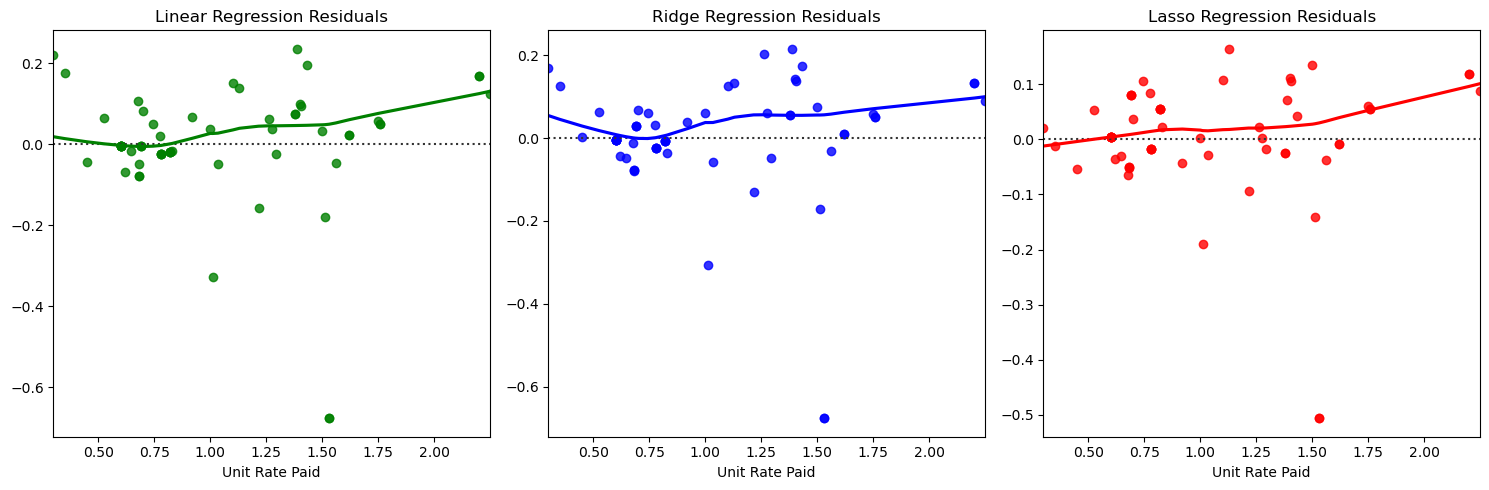

In [55]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Define features (X) and target variable (y)
X = x_combined
y = final_df['Unit Rate Paid']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
linear_model = LinearRegression()
ridge_model = Ridge(alpha=1.0)
lasso_model = Lasso(alpha=0.1)

# Fit models on the training data
linear_model.fit(X_train_scaled, y_train)
ridge_model.fit(X_train_scaled, y_train)
lasso_model.fit(X_train_scaled, y_train)

# Predictions on the testing data
y_pred_linear = linear_model.predict(X_test_scaled)
y_pred_ridge = ridge_model.predict(X_test_scaled)
y_pred_lasso = lasso_model.predict(X_test_scaled)

# Evaluate the models
mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

r2_linear = r2_score(y_test, y_pred_linear)
r2_ridge = r2_score(y_test, y_pred_ridge)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Cross-validation scores
cv_linear = cross_val_score(linear_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
cv_ridge = cross_val_score(ridge_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
cv_lasso = cross_val_score(lasso_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')



print("Linear Regression - Mean Squared Error:", mse_linear)
print("Linear Regression - R² Score:", r2_linear)
print("Linear Regression - Cross-Validation MSE:", -np.mean(cv_linear))

print("Ridge Regression - Mean Squared Error:", mse_ridge)
print("Ridge Regression - R² Score:", r2_ridge)
print("Ridge Regression - Cross-Validation MSE:", -np.mean(cv_ridge))

print("Lasso Regression - Mean Squared Error:", mse_lasso)
print("Lasso Regression - R² Score:", r2_lasso)
print("Lasso Regression - Cross-Validation MSE:", -np.mean(cv_lasso))


# Coefficients
coefficients_linear = linear_model.coef_
coefficients_ridge = ridge_model.coef_
coefficients_lasso = lasso_model.coef_

# Intercept
intercept_linear = linear_model.intercept_
intercept_ridge = ridge_model.intercept_
intercept_lasso = lasso_model.intercept_

feature_names = ['Single Unit Mtrl Yield (in²)', 'Single Unit Inches of Rule', 'Box Internal Length', 
                 'Box Internal Width', 'Box Internal Depth', 'Box External Length', 'Box External Width', 
                 'Box External Depth', 'Area', 'Insert Height', 'Height Range categorical', 
                 'Diameter Range categorical', 'Status_Listed', 'Application_Shipping Box', 'Config_3-Pack', 
                 'Config_4-Pack', 'Config_6-Pack', 'Config_8-Pack', 'Config_Single', 'Insert Style_Closed', 
                 'Insert Style_Open', 'Box Style_RETF - Traditional', 'Material_200# E Flute Kraft']

print("Linear Regression - Intercept:", intercept_linear)
print("Linear Regression - Coefficients:", coefficients_linear)
print("Ridge Regression - Intercept:", intercept_ridge)
print("Ridge Regression - Coefficients:", coefficients_ridge)
print("Lasso Regression - Intercept:", intercept_lasso)
print("Lasso Regression - Coefficients:", coefficients_lasso)
print("Features:", feature_names)

# Residual plots
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.residplot(x=y_test, y=y_pred_linear, lowess=True, color="g")
plt.title('Linear Regression Residuals')

plt.subplot(1, 3, 2)
sns.residplot(x=y_test, y=y_pred_ridge, lowess=True, color="b")
plt.title('Ridge Regression Residuals')

plt.subplot(1, 3, 3)
sns.residplot(x=y_test, y=y_pred_lasso, lowess=True, color="r")
plt.title('Lasso Regression Residuals')

plt.tight_layout()
plt.show()


In [56]:
from sklearn.model_selection import GridSearchCV

# Ridge Regression hyperparameter tuning
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train_scaled, y_train)

# Lasso Regression hyperparameter tuning
lasso_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso_grid = GridSearchCV(Lasso(), lasso_params, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train_scaled, y_train)

# Best parameters and scores
print("Best Ridge alpha:", ridge_grid.best_params_)
print("Best Ridge CV MSE:", -ridge_grid.best_score_)
print("Best Lasso alpha:", lasso_grid.best_params_)
print("Best Lasso CV MSE:", -lasso_grid.best_score_)


Best Ridge alpha: {'alpha': 1}
Best Ridge CV MSE: 0.010680391128195892
Best Lasso alpha: {'alpha': 0.01}
Best Lasso CV MSE: 0.01115607989431744


Linear Regression - Mean Squared Error: 0.02617702596940818
Linear Regression - R² Score: 0.881906280985319
Linear Regression - Cross-Validation MSE: 0.011603139770792322
Optimized Ridge Regression - Mean Squared Error: 0.02605962343265367
Optimized Ridge Regression - R² Score: 0.8824359248876973
Optimized Ridge Regression - Cross-Validation MSE: 0.010680391128195892
Optimized Lasso Regression - Mean Squared Error: 0.02526313577788107
Optimized Lasso Regression - R² Score: 0.8860291592532552
Optimized Lasso Regression - Cross-Validation MSE: 0.01115607989431744
Linear Regression - Intercept: 1.0035368852459021
Linear Regression - Coefficients: [ 0.64776489 -0.24003158  2.01508249 -6.06033816  2.62247307 -2.0779485
  6.28013512 -2.13814972 -0.18312675 -0.41090908  0.13697321 -0.19149583
  0.0077603  -0.09207517 -0.0269961  -0.01441668 -0.03752288 -0.01058038
 -0.0331199   0.2355196   0.16817199  0.05837927  0.41907343]
Optimized Ridge Regression - Intercept: 1.0035368852459017
Optimized

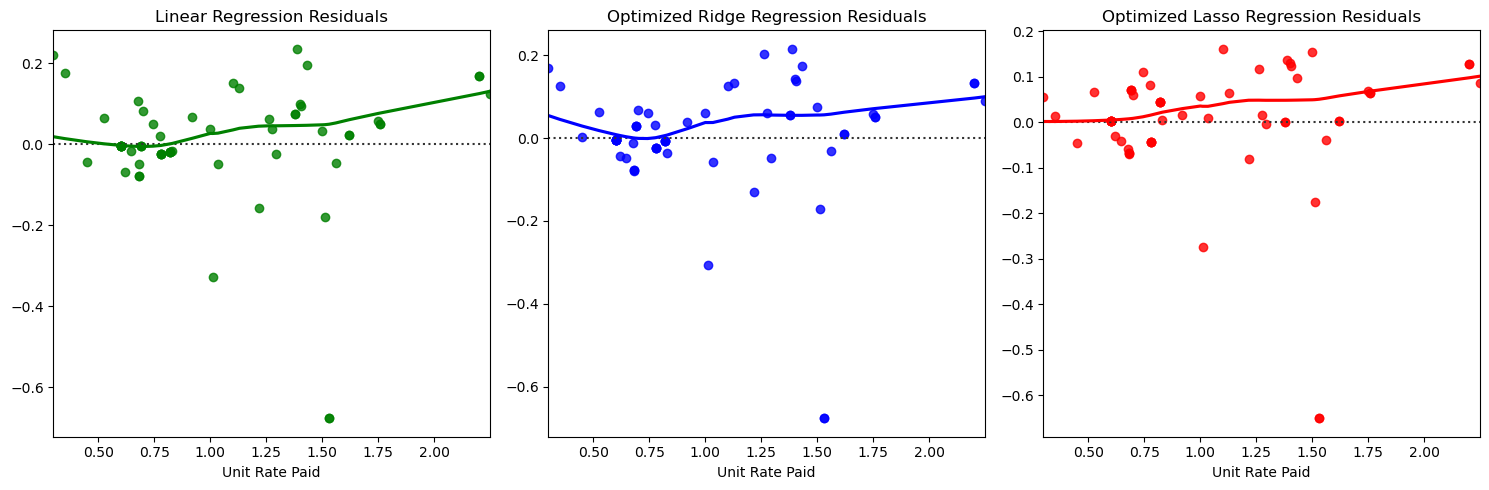

In [57]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Define features (X) and target variable (y)
X = x_combined
y = final_df['Unit Rate Paid']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models with optimal alpha values
linear_model = LinearRegression()
ridge_model_opt = Ridge(alpha=1)
lasso_model_opt = Lasso(alpha=0.01)

# Fit models on the training data
linear_model.fit(X_train_scaled, y_train)
ridge_model_opt.fit(X_train_scaled, y_train)
lasso_model_opt.fit(X_train_scaled, y_train)

# Predictions on the testing data
y_pred_linear = linear_model.predict(X_test_scaled)
y_pred_ridge_opt = ridge_model_opt.predict(X_test_scaled)
y_pred_lasso_opt = lasso_model_opt.predict(X_test_scaled)

# Evaluate the models on test data
mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_ridge_opt = mean_squared_error(y_test, y_pred_ridge_opt)
r2_ridge_opt = r2_score(y_test, y_pred_ridge_opt)

r2_linear = r2_score(y_test, y_pred_linear)
mse_lasso_opt = mean_squared_error(y_test, y_pred_lasso_opt)
r2_lasso_opt = r2_score(y_test, y_pred_lasso_opt)

# Cross-validation scores
cv_linear = cross_val_score(linear_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
cv_ridge_opt = cross_val_score(ridge_model_opt, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
cv_lasso_opt = cross_val_score(lasso_model_opt, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
cv_results =(cv_linear, cv_ridge_opt, cv_lasso_opt)

print("Linear Regression - Mean Squared Error:", mse_linear)
print("Linear Regression - R² Score:", r2_linear)
print("Linear Regression - Cross-Validation MSE:", -np.mean(cv_linear))

print("Optimized Ridge Regression - Mean Squared Error:", mse_ridge_opt)
print("Optimized Ridge Regression - R² Score:", r2_ridge_opt)
print("Optimized Ridge Regression - Cross-Validation MSE:", -np.mean(cv_ridge_opt))

print("Optimized Lasso Regression - Mean Squared Error:", mse_lasso_opt)
print("Optimized Lasso Regression - R² Score:", r2_lasso_opt)
print("Optimized Lasso Regression - Cross-Validation MSE:", -np.mean(cv_lasso_opt))

# Coefficients
coefficients_linear = linear_model.coef_
coefficients_ridge_opt = ridge_model_opt.coef_
coefficients_lasso_opt = lasso_model_opt.coef_

# Intercept
intercept_linear = linear_model.intercept_
intercept_ridge_opt = ridge_model_opt.intercept_
intercept_lasso_opt = lasso_model_opt.intercept_

feature_names = ['Single Unit Mtrl Yield (in²)', 'Single Unit Inches of Rule', 'Box Internal Length', 
                 'Box Internal Width', 'Box Internal Depth', 'Box External Length', 'Box External Width', 
                 'Box External Depth', 'Area', 'Insert Height', 'Height Range categorical', 
                 'Diameter Range categorical', 'Status_Listed', 'Application_Shipping Box', 'Config_3-Pack', 
                 'Config_4-Pack', 'Config_6-Pack', 'Config_8-Pack', 'Config_Single', 'Insert Style_Closed', 
                 'Insert Style_Open', 'Box Style_RETF - Traditional', 'Material_200# E Flute Kraft']

print("Linear Regression - Intercept:", intercept_linear)
print("Linear Regression - Coefficients:", coefficients_linear)
print("Optimized Ridge Regression - Intercept:", intercept_ridge_opt)
print("Optimized Ridge Regression - Coefficients:", coefficients_ridge_opt)
print("Optimized Lasso Regression - Intercept:", intercept_lasso_opt)
print("Optimized Lasso Regression - Coefficients:", coefficients_lasso_opt)
print("Features:", feature_names)

# Residual plots
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.residplot(x=y_test, y=y_pred_linear, lowess=True, color="g")
plt.title('Linear Regression Residuals')

plt.subplot(1, 3, 2)
sns.residplot(x=y_test, y=y_pred_ridge_opt, lowess=True, color="b")
plt.title('Optimized Ridge Regression Residuals')

plt.subplot(1, 3, 3)
sns.residplot(x=y_test, y=y_pred_lasso_opt, lowess=True, color="r")
plt.title('Optimized Lasso Regression Residuals')

plt.tight_layout()
plt.show()



Mean Absolute Error (MAE) Linear: 0.08212184551331968
Mean Absolute Error (MAE) Ridge: 0.08376822390554925
Mean Absolute Error (MAE) Lasso: 0.08970471195906547
Root Mean Squared Error (RMSE): 0.161793157980825
Adjusted R² Score: 0.8084966718680846


/Users/smarnita/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


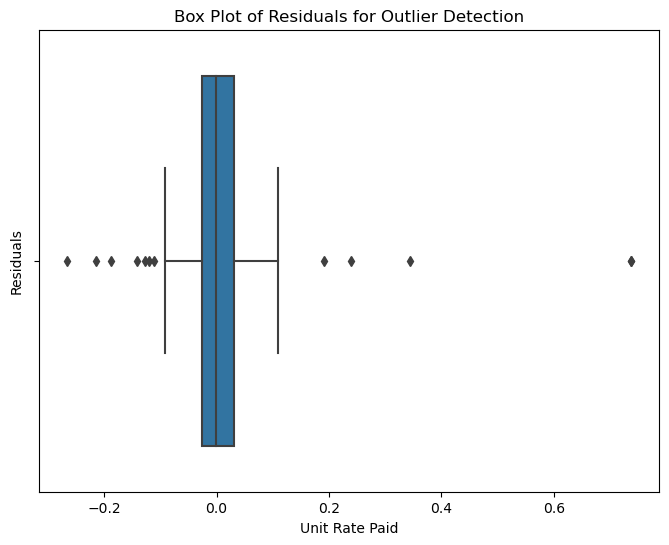

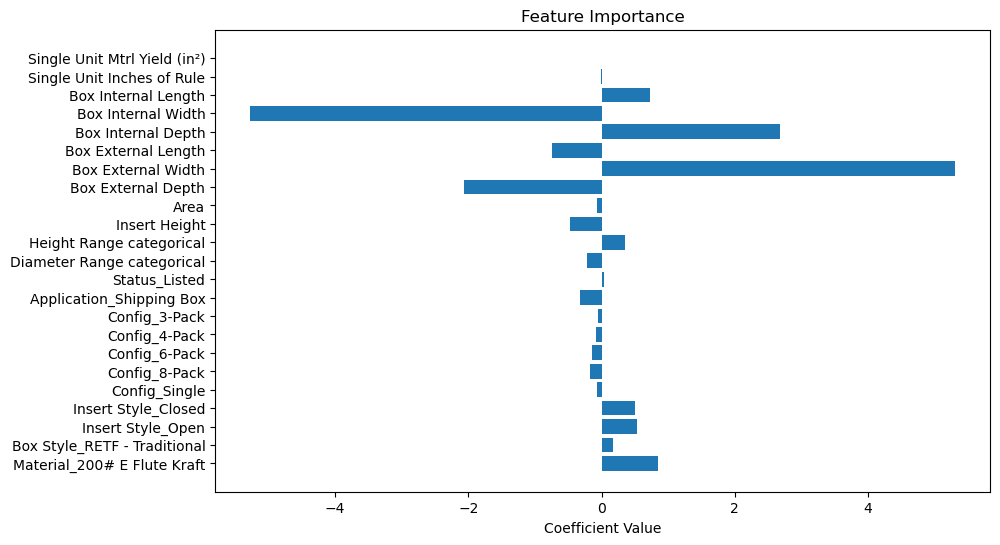

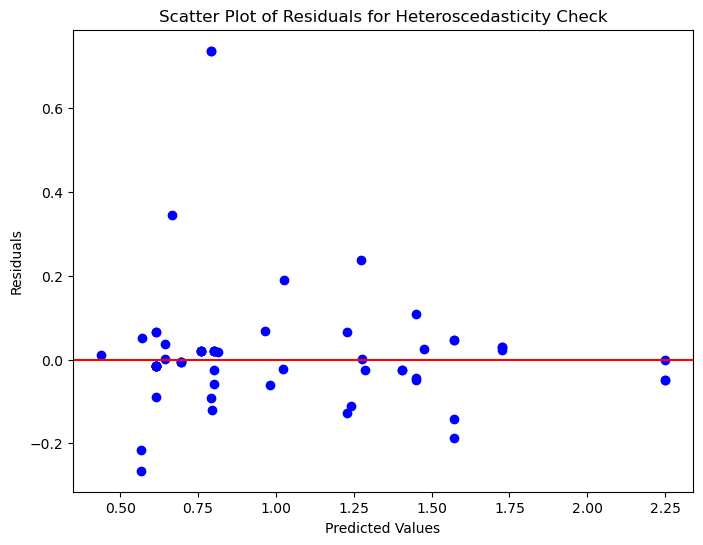

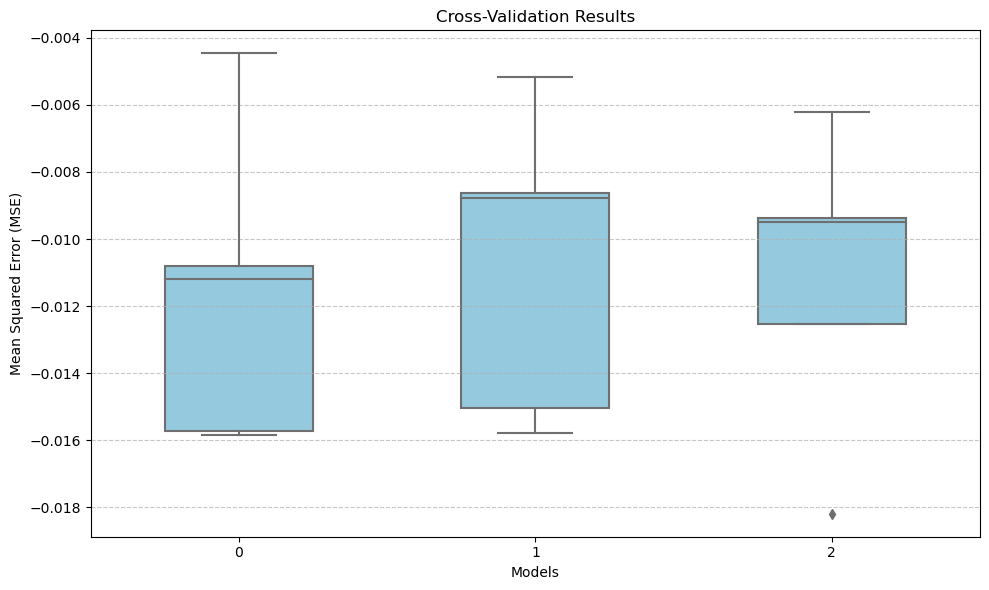

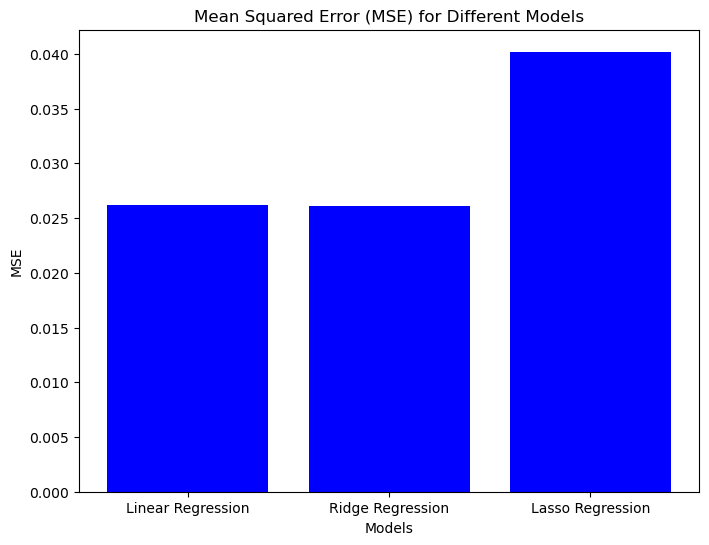

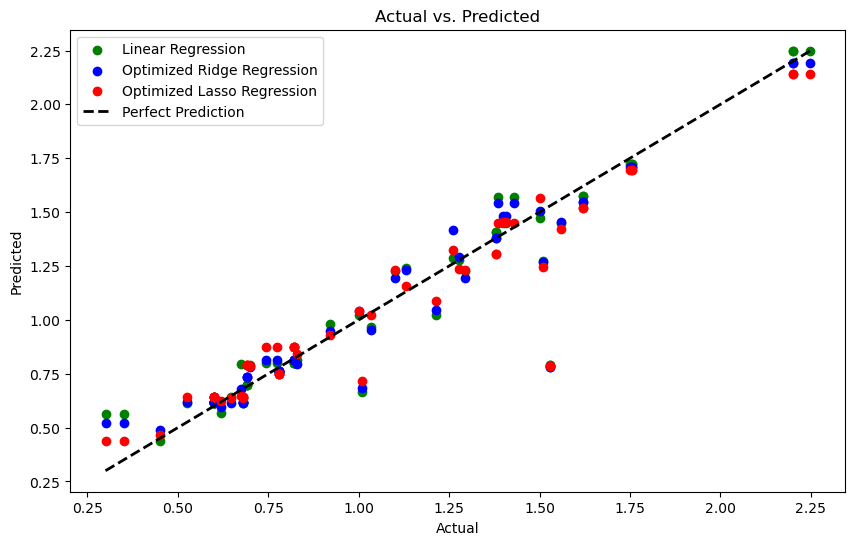

In [58]:
from sklearn.metrics import mean_absolute_error

# Calculate MAE
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge_opt)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso_opt)



print("Mean Absolute Error (MAE) Linear:", mae_linear)
print("Mean Absolute Error (MAE) Ridge:", mae_ridge)
print("Mean Absolute Error (MAE) Lasso:", mae_lasso)




# Calculate RMSE
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse)

# Calculate Adjusted R²
r2 = r2_score(y_test, y_pred)
n = len(X_test)
p = len(feature_names)
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("Adjusted R² Score:", adjusted_r2)


# Box plot for outlier detection
plt.figure(figsize=(8, 6))
sns.boxplot(y_test - y_pred)
plt.title('Box Plot of Residuals for Outlier Detection')
plt.ylabel('Residuals')
plt.show()


# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients)
plt.xlabel('Coefficient Value')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to show most important features on top
plt.show()

# Scatter plot of residuals for heteroscedasticity check
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, y_test - y_pred, color='blue')
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Scatter Plot of Residuals for Heteroscedasticity Check')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


# Create box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=cv_results, color='skyblue', width=0.5)
plt.title('Cross-Validation Results')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(fontsize=10)  # Adjust x-axis label font size
plt.yticks(fontsize=10)  # Adjust y-axis label font size
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

# Bar plot for model comparison
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression']
mse_values = [mse_linear, mse_ridge, mse_lasso]

plt.figure(figsize=(8, 6))
plt.bar(models, mse_values, color='blue')
plt.title('Mean Squared Error (MSE) for Different Models')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.show()


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, color='green', label='Linear Regression')
plt.scatter(y_test, y_pred_ridge_opt, color='blue', label='Optimized Ridge Regression')
plt.scatter(y_test, y_pred_lasso_opt, color='red', label='Optimized Lasso Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.legend()
plt.show()


In [59]:
import pandas as pd

# Example test data (assuming they match the features used in the model)
test_data = {
    'Single Unit Mtrl Yield (in²)': [5.59375, 0, 2.9375, 0, 2.28125, 2.28125],
    'Single Unit Inches of Rule': [2.8125, 0, 2.9375, 0, 2.28125, 2.28125],
    'Box Internal Length': [7, 0, 6.75, 0, 5.25, 5.25],
    'Box Internal Width': [0, 0, 0, 2.4375, 0, 0],
    'Box Internal Depth': [0, 0, 0, 2.5625, 0, 0],
    'Box External Length': [42.375, 18.875, 39.0625, 20.90625, 37.125, 42.03125],
    'Box External Width': [38.125, 51.5, 27.34375, 15, 14, 29.09375],
    'Box External Depth': [16.6, 12.3, 10.8, 3, 6, 13.1],
    'Area': [1283, 945, 830, 234, 461, 1009],
    'Insert Height': [753, ), 526, 224, 407, 662],
    'Height Range categorical': [0, 0, 0, 0, 0, 0],
    'Diameter Range categorical': [2.8125, 0 , 2.9375, 2.4375, 2.28125, 2.28125],
    'Status_Listed': [0, 0, 0, 0, 0, 0],
    'Application_Shipping Box': [1, 1, 1, 1, 1, 1],
    'Config_3-Pack': [0, 0, 0, 0, 0, 0],
    'Config_4-Pack': [0, 0, 0, 0, 1, 1],
    'Config_6-Pack': [1, 0, 0, 0, 0, 0],
    'Config_8-Pack': [0, 0, 0, 0, 0, 0],
    'Config_Single': [0, 1, 1, 1, 0, 0],
    'Insert Style_Closed': [0, 0, 0, 0, 0, 0],
    'Insert Style_Open': [1, 0, 1, 1, 1, 1],
    'Box Style_RETF - Traditional': [0, 1, 0, 1, 0, 0],
    'Material_200# E Flute Kraft': [0, 1, 0, 1, 0, 0]
}

test_df = pd.DataFrame(test_data)

# Scale the test data
X_test_scaled = scaler.transform(test_df)

# Make predictions
y_pred_linear = linear_model.predict(X_test_scaled)
y_pred_ridge_opt = ridge_model_opt.predict(X_test_scaled)
y_pred_lasso_opt = lasso_model_opt.predict(X_test_scaled)

# Create a DataFrame to compare the predictions
predictions_df = pd.DataFrame({
    'Test Case': ['F0662', 'F0663', 'F0664-1G', 'F0672', 'F0676', 'F0677'],
    'Linear Regression': y_pred_linear,
    'Optimized Ridge Regression': y_pred_ridge_opt,
    'Optimized Lasso Regression': y_pred_lasso_opt
})

print(predictions_df)



/Users/smarnita/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Diameter Range categorical
- Height Range categorical
Feature names seen at fit time, yet now missing:
- Dia. (in)
- Ht. (in)

  warnings.warn(message, FutureWarning)


Number of components explaining 95% variance: 9
VIF Data after PCA:
  Component  VIF
0       PC1  1.0
1       PC2  1.0
2       PC3  1.0
3       PC4  1.0
4       PC5  1.0
5       PC6  1.0
6       PC7  1.0
7       PC8  1.0
8       PC9  1.0


NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
from statsmodels.compat import lzip
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm

# Fit the regression model
model = sm.OLS(y_train, X_train)
results = model.fit()

# Calculate squared residuals
squared_resid = results.resid**2

# Perform Breusch-Pagan test
bp_test = het_breuschpagan(squared_resid, X_train)

# Extract test statistics and p-values
test_statistic = bp_test[0]
p_value = bp_test[1]

print("Breusch-Pagan Test - Test Statistic:", test_statistic)
print("Breusch-Pagan Test - p-value:", p_value)


In [ ]:
Analysis
Linear Regression:

Slightly higher MSE and cross-validation MSE compared to Ridge and Lasso regression.
R² score is slightly lower than both optimized Ridge and Lasso regression.
Optimized Ridge Regression:

Best cross-validation MSE (0.010680391128195892), indicating better generalization performance.
Similar test set performance (MSE and R² score) to Linear Regression.
Optimized Lasso Regression:

Best test set performance with the lowest MSE (0.02526313577788107) and highest R² score (0.8860291592532552).
Performs feature selection, which simplifies the model by setting some coefficients to zero.
Cross-validation MSE is slightly higher than Ridge Regression but still competitive.
Decision Criteria
Performance on Test Data: If test set performance (MSE and R² score) is the primary concern, Lasso Regression has a slight edge.
Generalization and Robustness: If you prioritize generalization performance, Ridge Regression has a slight advantage based on cross-validation MSE.
Model Simplicity and Interpretability: If model simplicity and interpretability are important, Lasso Regression is preferable because it reduces the number of features by setting some coefficients to zero.
Final Recommendation
Given the close performance metrics, the choice of the best model depends on your priorities:

Ridge Regression: If you prefer a model with potentially better generalization as indicated by the cross-validation MSE, go with Ridge Regression. This model retains all features but applies regularization to mitigate overfitting.

Lasso Regression: If you value model simplicity and interpretability, choose Lasso Regression. It has the best test set performance and performs feature selection, which can make the model easier to interpret and potentially more efficient.

Considering all factors, Lasso Regression might be slightly more advantageous due to its superior test set performance and simplicity, unless the slightly better cross-validation MSE of Ridge Regression is a critical factor for your application.